# Kernel Recursive Least Squares (KRLS) & Kernel Least Mean Squares

Example: Time series prediction

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from knlms import *

In [2]:
num_data = 3000
num_experiments = 200

# AWGN
v = 0.1*np.random.normal(0,1,num_data+2) 

# Initial conditions
d_true =[0.1 , 0.1]
d = [d_true[0] + v[0], d_true[1] + v[1]]

# Grab new data
new_d_true = lambda d: d.append((0.8 - 0.5 * np.exp(-(d[-1]**2)))*d[-1] - (0.3 + np.exp(-(d[-1]**2)))*d[-2] + 0.1*np.sin(np.pi*d[-1]))
for i in range(2,num_data+2):
    new_d_true(d_true)
    d.append(d_true[-1] + v[i])
d_true = d_true[2::]
d = d[2::]

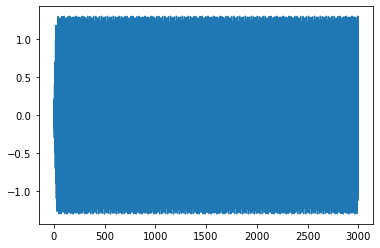

In [3]:
plt.plot(range(len(d_true)),d_true)

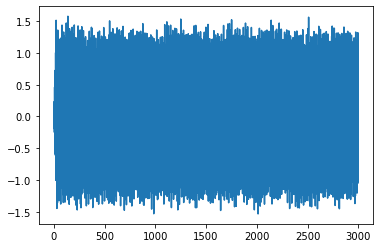

In [4]:
plt.plot(range(len(d)),d)

SV accepted
SV accepted
SV accepted
SV accepted
SV accepted
SV accepted
SV accepted
SV accepted
SV accepted
SV accepted
SV accepted
SV accepted
SV accepted
SV accepted
SV accepted
SV accepted
SV accepted
SV accepted
SV accepted
SV accepted
SV accepted
SV accepted
SV accepted
SV accepted
SV accepted
SV accepted
SV accepted
number of SVs 28


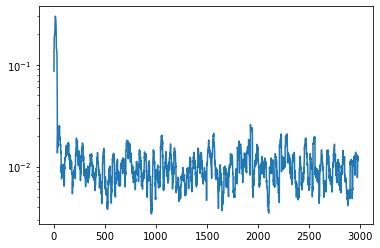

In [144]:

# Kernel from Richard Paper

gauss_kernel = lambda u_i,u_j: np.exp(-3.73 * (np.linalg.norm(u_i - u_j,ord=2)**2))
nmse = lambda D_n, Phi_n: np.sum((D_n - Phi_n)**2)

kernel = gauss_kernel


step_size = 0.09
reg_coeff = 0.03


threshold = 0.6
mse_KRLS = np.array([])
err = np.array([])

# Initalization
u = np.matrix([d[0],d[1]])
dictionary = np.matrix(u)
h = np.matrix(kernel(u,dictionary))
k = np.matrix(kernel(u,u))
K_inv = np.matrix(1/k)

P = np.matrix(1)
alpha = np.matrix(d[0]/k)
m = 1

for n in range(1, len(d)):
    u_n = np.matrix([d[n-1],d[n]])
    d_n = np.matrix(d[n])
    k = np.matrix(kernel(u_n,u_n))
    h = np.matrix([kernel(u_n,dictionary[j]) for j in range(len(dictionary))]).T
#     print('k_inv',K_inv)
#     print('h',h)
    a = np.matrix(K_inv @ h)
    delta = (k - h.T @ a).item()
    err = np.append(err,d_n - h.T @ alpha)
    if delta > threshold:
        dictionary = np.r_[dictionary, u_n]

        K_inv_num = np.c_[delta*K_inv + a @ a.T,-a]
        K_inv_den = np.c_[-a.T, 1]
        K_inv = np.r_[K_inv_num,K_inv_den]
        K_inv = K_inv/delta

        P_num = np.c_[P,np.zeros((m,1))]
        P_den = np.c_[np.zeros((m,1)).T, 1]
        P = np.r_[P_num,P_den]
#         P = np.matrix([[P, np.zeros((m,1))],
#                        [np.zeros((m,1)).T, 1]])
        
        alpha = np.matrix(alpha - ((a * err[-1])/delta))
        alpha = np.r_[alpha,[[err[-1]/delta]]]
        
        
        m = m + 1

    else:
#         print('P',P)
#         print('a',a)
#         print('Pa',P @ a)
        q_t = (P @ a)/(1 + a.T @ P @ a)
        P = P - ((P @ a @ a.T @ P)/(1 + a.T @ P @ a))

        alpha = alpha + K_inv @ q_t * err[-1]

    mse_KRLS = np.append(mse_KRLS, (d_true[n]-d_n + err[-1].item())**2)
    
mse_KRLS_smooth = np.convolve(mse_KRLS,np.ones(20),'valid') / 20
plt.semilogy(range(len(mse_KRLS_smooth)),mse_KRLS_smooth)
print('number of SVs', len(dictionary))

In [18]:
gauss_kernel = lambda u_i,u_j: np.exp(-3.73 * (np.linalg.norm(u_i - u_j,ord=2)**2))
kernel = gauss_kernel
u = np.matrix([d[0],d[1]])
k = np.matrix(kernel(u,u))
K_inv = np.matrix(1/k)
alpha = np.matrix(d[0]/k)
dictionary = np.matrix(u)

In [87]:
# err = np.array([])
err = np.append(err,1)
# err = np.r_[err,1]
err.T

array([1., 1., 1., 1., 1.])

In [83]:
# KNLMS(d,d_true,kernel,step_size,reg_coeff,threshold)

In [ ]:
# KRLS

# Kernel Recursive Least Sqaures depends on a kernel functionin which to evaluate the points in a higher 
# dimension without needing to create and analyaze in the higher dimensional plane as this would create
# significant computing cost

# The use of kernel functions are valuable as they transform the data into another plane in which they become
# easy to evaluate

# for this demonstration we will be utilizing the guassian kernel function

